<a href="https://colab.research.google.com/github/DanielTusingwire/CUU-Lab-2024/blob/main/MulitpleLinearRegression_CAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Multiple Linear Regression model**
a). Graphical representation.  (4 marks)

b).  Intercept. (2 marks)

c). Coefficient. (2 marks)
  
d). The model relationship in the form of   Y=A+BX_(1  )+CX_2+⋯+NX_n  where Y is dependent variable X_1,X_2,X_3,……X_n    are independent variables B, C, …….N are coefficients and A is the intercept.   (2 marks)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_file_path = '/content/drive/MyDrive/BSE 3 2/Simulation & Modeling Labs/CAT1 /budget.csv'

df = pd.read_csv(my_file_path)

# cleaning the dataset
if 'Unnamed: 6' in df.columns:
    df = df.drop('Unnamed: 6', axis=1)

df

,Year,Global GDP Index per Capita,#Cust serv Calls ('000s),#Employess ('000),#Items ('000),#Revenue ($M)
0,1,100,25,45,11,2000
1,2,112,27,53,11,2400
2,3,115,22,54,12,2700
3,4,123,27,58,14,2900
4,5,122,32,60,14,3200
5,6,132,33,65,15,3500
6,7,143,40,72,16,4000
7,8,126,30,65,16,4200
8,9,166,34,85,17,4500
9,10,157,47,97,18,4700


In [ ]:
# Creating a copy of the DataFrame for processing
cdf = df.copy()



In [ ]:
X = cdf[['Global GDP Index per Capita', '#Cust serv Calls (\'000s)', '#Employess (\'000)', '#Items (\'000)']]
y = cdf['#Revenue ($M)']

In [ ]:
# i have Randomly splitted the data into training and testing sets (80% training, 20% testing)
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# **Separating the independent and dependent variables for training and testing**

In [ ]:
# Separate the independent and dependent variables for training
X_train = train[['Global GDP Index per Capita', '#Cust serv Calls (\'000s)', '#Employess (\'000)', '#Items (\'000)']]
y_train = train['#Revenue ($M)']

# Separate the independent and dependent variables for testing
X_test = test[['Global GDP Index per Capita', '#Cust serv Calls (\'000s)', '#Employess (\'000)', '#Items (\'000)']]
y_test = test['#Revenue ($M)']


# **Building and Training the model**

In [ ]:
# Train the linear regression model using the training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test the model on the testing data and train data
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

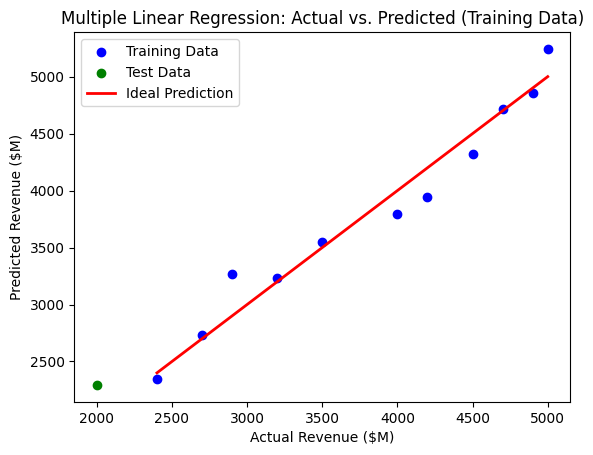

In [ ]:
# a) Graphical representation


plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
plt.scatter(y_test, y_pred_test, color='green', label='Test Data')
plt.plot(y_train, y_train, color='red', linewidth=2, label='Ideal Prediction')
plt.xlabel('Actual Revenue ($M)')
plt.ylabel('Predicted Revenue ($M)')
plt.title('Multiple Linear Regression: Actual vs. Predicted (Training Data)')
plt.legend()
plt.show()

In [ ]:
# b) Intercept
intercept = model.intercept_
print("Intercept (A):", intercept)


# c) Coefficients
coefficients = model.coef_
print("Coefficients (B, C, ... N):", coefficients)


# d) Model relationship in the form of Y = A + BX1 + CX2 + ... + NXn
variables = ['Global GDP Index per Capita', '#Cust serv Calls (\'000s)', '#Employess (\'000)', '#Items (\'000)']
model_equation = 'Y = {:.2f}'.format(intercept)
for idx, variable in enumerate(variables):
    model_equation += ' + {:.2f} * {}'.format(coefficients[idx], variable)

print("Model relationship:", model_equation)

Intercept (A): -779.7118953072313
Coefficients (B, C, ... N): [ -7.46138239 -18.05196714  22.6650755  295.58718259]
Model relationship: Y = -779.71 + -7.46 * Global GDP Index per Capita + -18.05 * #Cust serv Calls ('000s) + 22.67 * #Employess ('000) + 295.59 * #Items ('000)


# **EVALUTION OF THE MODEL**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate and display model performance metrics (R-squared and Mean Squared Error) for testing data
r_squared = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
print("\nModel Performance Metrics (Testing Data):")
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)


Model Performance Metrics (Testing Data):
R-squared: 0.9595855800229036
Mean Squared Error: 31509.887443299744


# The Multiple Linear Regression model scores **95.95%** accurate